<a href="https://colab.research.google.com/github/MihoiIvan10/NUMERICOS-PYTHON/blob/main/prac7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nodos de interpolación: [-10.0, -8.666666666666666, -7.333333333333334, -6.0, -4.666666666666667, -3.333333333333333, -2.0, -0.6666666666666661, 0.6666666666666661, 2.0, 3.333333333333334, 4.666666666666666, 6.0, 7.333333333333332, 8.666666666666668, 10.0]
Valores de y: [0.5440211108893698, -0.6875512151130617, -0.8674968696188063, 0.27941549819892586, 0.9989549170979283, 0.19056796287548494, -0.9092974268256817, -0.6183698030697365, 0.6183698030697365, 0.9092974268256817, -0.19056796287548583, -0.9989549170979283, -0.27941549819892586, 0.8674968696188055, 0.6875512151130604, -0.5440211108893698]
Polinomio interpolador de Lagrange:
-2.47510357114089e-13*x**15 - 4.65289094561078e-25*x**14 + 1.1046554012463e-10*x**13 - 7.61006163548785e-23*x**12 - 2.24017482892196e-8*x**11 - 3.89635155736978e-20*x**10 + 2.6792275676133e-6*x**9 - 3.52365706057789e-19*x**8 - 0.000197262835741096*x**7 + 1.0842021724855e-17*x**6 + 0.00832533619465709*x**5 + 1.87350135405495e-16*x**4 - 0.166646993369605*x**3 

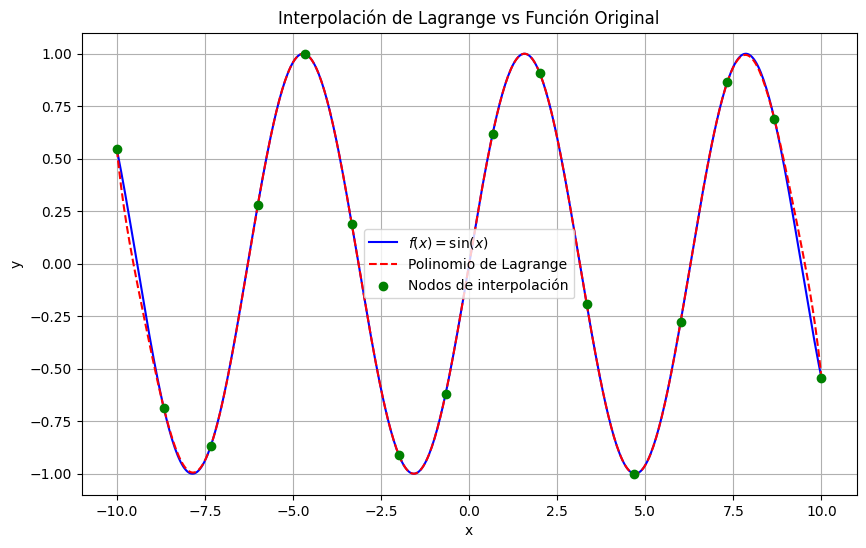

In [3]:
import sympy as sy
import math
import numpy as np
import matplotlib.pyplot as plt


# FUNCION PRINCIPAL
def lagrange(x, y):
    var = sy.Symbol('x')
    n = len(x)
    yp = 0
    for i in range(n):
        p = 1
        p1 = 1
        for j in range(n):
            if(j != i):
                p = p * (var - x[j])
                p1 = p1 * (x[i] - x[j])
        Li = p / p1
        yp += Li * y[i]
        poly = yp.expand()
    return poly

# NODOS EQUIDISTANTES
def nodes(n):
    node = []
    for i in range(n + 1):
        x_i = -10 + (20 * i) / n
        node.append(x_i)
    return node

def f(x):
    return math.sin(x)   # Ejemplo de funcion

# Grafica
def grafica(x_values, y_values, poly):

    x_sym = sy.Symbol('x')
    poly_func = sy.lambdify(x_sym, poly, 'numpy')

    # Valores para la gráfica
    x_plot = np.linspace(min(x_values), max(x_values), 500)
    y_poly = poly_func(x_plot)
    y_original = np.sin(x_plot)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_original, label=r'$f(x) = \sin(x)$', color='blue')
    plt.plot(x_plot, y_poly, label="Polinomio de Lagrange", color='red', linestyle='--')
    plt.scatter(x_values, y_values, color='green', label="Nodos de interpolación", zorder=5)

    plt.title("Interpolación de Lagrange vs Función Original")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":

    # Definir número de nodos y generar puntos equidistantes en [-5, 5]
    n = 15
    x_values = nodes(n)

    y_values = []
    for i in x_values:
        yi=f(i)
        y_values.append(yi)

    poly = lagrange(x_values, y_values)

    # Mostrar resultados
    print("Nodos de interpolación:", x_values)
    print("Valores de y:", y_values)
    print("Polinomio interpolador de Lagrange:")
    print(poly)

    grafica(x_values, y_values, poly)


interpolador de Lagrange que aproxima la función f(x) = sin(x) mediante un polinomio que pasa exactamente por los nodos dados.
Flujo del programa:

-) Genera nodos equidistantes en [-5, 5] con nodes(n), ya que son los mas faciles de poner y podemos ajustar dependiendop los nodos sera mejor nuestra aprox asi como igual podemos ajustar [a,b]

-) Evalúa la función sin(x) en esos nodos para obtener y_values.

-) Calcula el polinomio de Lagrange con lagrange(x_values, y_values)

-) Construye términos L_i(x) que valen 1 en x_i y 0 en otros nodos.

-) Combina estos términos multiplicados por y_values[i].

-) Grafica